# **Ensuring Effective Supervision of Taxpayers by Analyzing and Profiling Using External Sources.**

## **Introduction**

Tax avoidance and tax evasion are both problematic issues for taxation in Indonesia. The country is estimated to lose approximately $6.48 billion in unpaid taxes annually due to these problems. Moreover, Indonesia, a middle-income nation, is placed 11th out of 30 countries when it comes to the extent of tax avoidance. This ranking is based on data from the International Center for Policy and Research (ICPR) and the International Center for Taxation and Development (ICTD) ([Cobham, 2018](https://https://doi.org/10.1002/jid.3348)).

Taxes are indeed crucial for Indonesia, and the issue of tax avoidance needs immediate attention. According to data, Indonesia's state revenue is planned to amount to `$`176.77 billion, consisting of tax revenue of `$`146.68 billion, non-tax state revenue of `$`30.62 billion, and grants of `$`25.42 million ([setkab.go.id, 2023](https://https://setkab.go.id/en/address-of-the-president-of-the-republic-of-indonesia-on-the-presentation-of-the-government-statement-on-the-bill-on-the-state-budget-for-the-2024-fiscal-year-and-its-financial-note-before-the-plena/)). This means that tax revenue accounts for around 82.98% of the Indonesian state budget's main source (`$`146.68 / `$`176.77) x 100%). Failure to achieve this revenue could potentially lead to a crisis fueled by increased debt.

Intense supervision from revenue agents at the Directorate General Taxes of the Republic of Indonesia is needed to prevent tax avoidance and tax evasion. However, this is more challenging than turning the palm of your hand because the proportion of revenue agents and taxpayers is quite different. One revenue agent must supervise around 422 taxpayers, whereas, in one year, there are only 365 days (Based on general knowledge, total taxpayers in Indonesia are around 19 million, and revenue agents are approximately 45,000. Thus, 422 = 19 million/45,000). Therefore, there must be several taxpayers who need to be better supervised. Automating the process of searching for taxpayers in cyberspace would be extremely helpful in streamlining the analysis and supervision of taxpayers. It can be quite a daunting task for revenue agents to sift through all the information available on cyberspace or financial news, one by one, to find what they need. An automated system would certainly make the process much more efficient and effective.

This research project aims to construct a taxpayer profile utilizing an Application Programming Interface (API) to collect data from financial news articles and Named Entity Recognition (NER) as a text analysis method. The development of an NER is expected to efficiently parse out names of entities, which in this project are specific taxpayers, throughout financial news, along with various tax-related conditions that could be delved deeper. This project would take some taxpayers in the US as an example to build the model, such as VF Corp., an apparel industry, and Palo Alto Networks, Inc., a computer and other electronic products industry. Both companies represent micro, small, and medium enterprises (MSME); in Indonesia, most MSMEs have low tax compliance. In addition, both industries are also industries that continue to develop and can be compared to each other.

Confidently, the project might provide a rigorous response to these two questions. 1) Is it necessary to conduct a detailed analysis of the tax potential for VF Corp., and Palo Alto Networks, Inc., and 2) which industries are currently experiencing growth and are best suited for a tax potential exploration? The hypothesis posits that a thorough analysis of the tax potential of VF Corp., and Palo Alto Networks, Inc., would yield valuable insights into potential tax revenue. Additionally, it anticipates that specific industries currently experiencing growth will offer favorable opportunities for further tax exploration. Eventually, this project will enable the precise direction of tax potential exploration policies toward more advanced industry sectors, measured by the more tax-related conditions that appear along with taxpayers' names in the text analysis.

## **Methods**

### **Text Collection**

The project employs a combination of News API and web scraping tools for data collection, with News API serving as the primary tool due to restrictions on web scraping for many online news articles. API, or Application Programming Interface, in this context, pertains to data APIs—interfaces crafted to facilitate data sharing and management, exemplified by the News API. These APIs function as software entities, varying in size from extensive systems to more streamlined structures. They act as intermediaries, connecting databases with users seeking access to the data ([Adam, 2019](https://medium.com/epfl-extension-school/an-illustrated-introduction-to-apis-10f8000313b9)). In contrast, web scraping involves directly extracting information from the internet. While manually copying and pasting data from a website represents a rudimentary form of web scraping, the term typically implies the use of automated tools and processes for data extraction ([Krisel, 2023](https://github.com/rskrisel/web_scraping_workshop)).

When using News API, the initial step involves installing and importing the requests library from Python to facilitate data requests from URLs  ([Krisel, 2023](https://github.com/rskrisel/web_scraping_workshop)). Installing News API before initiating communication within the Python environment is crucial. To gain access to the News API library, individuals need to register on the News API website to obtain a token or key. Once acquired, this key allows the importation of several articles on the News API, and we can continue to import several important libraries. For instance, BeatifulSoup for the purpose of refining and interpreting HTML text data, utilizing Pandas for visualizing and manipulating tabular data, JSON (JavaScript Object Notation) for encoding data structures to ensure machine readability, Glob for establishing connections to directories in your operating system, Word Cloud for generating visual representations of word frequencies, and Matplotlib for visualizing the Word Clouds ([Krisel, 2023](https://github.com/rskrisel/web_scraping_workshop)). The last and also essential library that needs to be imported is pprint or Pretty Print, a utility module employed for displaying data structures in an organized and easily understandable manner ([Krisel, 2023](https://gist.github.com/rskrisel/4ff9629df9f9d6bf5a638b8ba6c13a68)).

In [ ]:
pip install requests

In [ ]:
import requests

In [ ]:
import json

In [ ]:
import pandas as pd

In [ ]:
!pip install newsapi-python

In [ ]:
import pprint

In [ ]:
secret= 'a552a6f4f4b84a04a55eed90dd3f92f4'

The data collection process can be initiated following the installation and importation of all essential libraries. Crucial to this is the setup of the endpoint and specification of the query in the News API data collection. ``The News API offers three endpoints: `/v2/top-headlines,` which fetches the most significant headlines categorized by country and topic; `/v2/everything,` which retrieves news articles from a vast array of over 30,000 sources; and `/v2/sources,` providing details about different news sources`` ([Krisel, 2023](https://gist.github.com/rskrisel/4ff9629df9f9d6bf5a638b8ba6c13a68)). ``In this project, the second endpoint, `/v2/everything`, is the designated endpoint``.

In [ ]:
url = 'https://newsapi.org/v2/everything?'

Moreover, the subsequent step involves defining parameters. As this project aims to compare two entities for analysis, two parameters are established. One parameter employs "Palo Alto Networks" as the query phrase, while the other utilizes "VF Corp." The project specifies a page size of 100, the maximum number allowed, and English as the language in the article ([Krisel, 2023](https://gist.github.com/rskrisel/4ff9629df9f9d6bf5a638b8ba6c13a68)). After configuring the parameters, the request is initiated, and the result is converted into JSON format, printed using the pretty print command. To gain a glimpse of the current condition of both entities, a strategic approach involves converting and printing the titles of the articles. Additionally, the utilization of Word Cloud visualization can provide valuable insights. Given that the result type is in dictionary format, it can be effortlessly converted into a Pandas DataFrame.

In [ ]:
parameters1 = {
    'q': 'Palo Alto Networks', # query phrase
    #'sources': 'new york times', #specify sources, if desired
    'pageSize': 100,  # maximum is 100
    'language': 'en',
    'apiKey': secret # your own API key
    }

In [ ]:
parameters2 = {
    'q': 'VF Corp',
    'pageSize': 100,
    'language': 'en',
    'apiKey': secret  # your own API key
}

In [ ]:
response1 = requests.get(url, params=parameters1)
response_json1 = response1.json()
pprint.pprint(response_json1)

{'articles': [{'author': 'Radek Zielinski',
               'content': 'Palo Alto Networks has acquired Israel-based '
                          'cybersecurity startup Talon Cyber Security for $625 '
                          'million, the company confirmed Monday.\r\n'
                          'The deal is Palo Alto’s second major cybersecurity '
                          'acquisition… [+2383 chars]',
               'description': 'Palo Alto Networks has acquired Israel-based '
                              'cybersecurity startup Talon Cyber Security for '
                              '$625 million, the company confirmed Monday. The '
                              'deal […]\n'
                              'The post Palo Alto Networks Acquires Israel’s '
                              'Talon Cyber for $625M appeared first on '
                              'ReadWrite.',
               'publishedAt': '2023-11-06T20:00:59Z',
               'source': {'id': None, 'name': 'ReadWrite'},
  

In [ ]:
response2 = requests.get(url, params=parameters2)
response_json2 = response2.json()
pprint.pprint(response_json2)

{'articles': [{'author': 'Walter Loeb, Senior Contributor, \n'
                         ' Walter Loeb, Senior Contributor\n'
                         ' https://www.forbes.com/sites/walterloeb/',
               'content': 'The North Face store in New York. (AP Photo/Ted '
                          'Shaffrey)\r\n'
                          'Copyright 2018 The Associated Press. All rights '
                          'reserved.\r\n'
                          'Legion Partners Asset Management has now directed '
                          'its focus on VFVFC\r\n'
                          ' Corp. It i… [+2539 chars]',
               'description': 'VF Corp. Is Under Second Activist Attack Legion '
                              'Partners Asset Management has now directed its '
                              'focus on VF Corp.',
               'publishedAt': '2023-10-26T10:45:00Z',
               'source': {'id': None, 'name': 'Forbes'},
               'title': 'VF Corp. Is Under Second Activist

In [ ]:
for i in response_json1['articles']:
    print(i['title'])

for i in response_json2['articles']:
    print(i['title'])

Palo Alto Networks Acquires Israel’s Talon Cyber for $625M
The Ratings Game: Palo Alto Networks’ stock is falling after trimmed billings outlook. Analysts say to look past the ‘noise.’
North Korea makes finding a gig even harder by attacking candidates and employers
Chinese Hackers Launch Covert Espionage Attacks on 24 Cambodian Organizations
Mustang Panda Hackers Targets Philippines Government Amid South China Sea Tensions
Palo Alto Networks Prisma Cloud Revolutionizes Code-to-Cloud Security
Palo Alto Networks Strata Cloud Manager proactively prevents network disruptions
CISA Adds Three Security Flaws with Active Exploitation to KEV Catalog
Novel backdoor persists even after critical Confluence vulnerability is patched
Resecurity integrates with Palo Alto Networks Cortex XSOAR Marketplace
Palo Alto Networks to acquire Talon Cyber Security
Palo Alto Networks adds BYOML framework to Cortex XSIAM 2.0
Palo Alto Networks to Acquire Cloud Security Start-Up Dig Security
Futures: These Two Te

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
text_combined1 = ''

In [ ]:
for i in response_json1['articles']:
    text_combined1 += i['title'] + ' '

print(text_combined1[:300])

Palo Alto Networks Acquires Israel’s Talon Cyber for $625M The Ratings Game: Palo Alto Networks’ stock is falling after trimmed billings outlook. Analysts say to look past the ‘noise.’ North Korea makes finding a gig even harder by attacking candidates and employers Chinese Hackers Launch Covert Esp


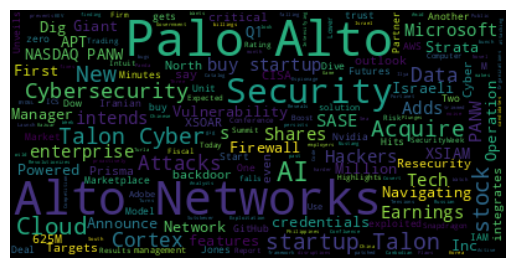

In [ ]:
wordcloud = WordCloud(max_font_size=40).generate(text_combined1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
text_combined2 = ''

In [ ]:
for i in response_json2['articles']:
    text_combined2 += i['title'] + ' '

print(text_combined2[:300])

VF Corp. Is Under Second Activist Attack VF Corp withdraws annual forecasts on slowing demand for higher-priced apparel Perfecting Paisley Prints With Bedwin & The Heartbreakers x Vans This Is One of the Best The North Face Jackets Ever Made. You Can't Buy It Timberland global brand president to ste


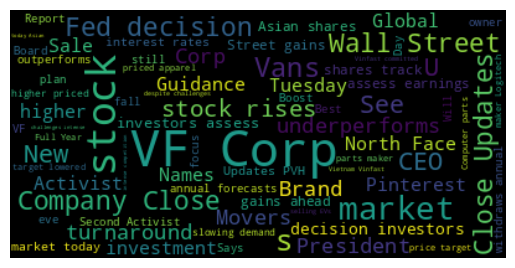

In [ ]:
wordcloud = WordCloud(max_font_size=40).generate(text_combined2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df1 = pd.DataFrame(response_json1['articles'])

# Create a DataFrame from response_json2
df2 = pd.DataFrame(response_json2['articles'])

# You now have two separate DataFrames, df1 and df2, with the article data

# To combine them into a single DataFrame, you can use the pandas.concat function
combined_df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df1

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'ReadWrite'}",Radek Zielinski,Palo Alto Networks Acquires Israel’s Talon Cyb...,Palo Alto Networks has acquired Israel-based c...,https://readwrite.com/palo-alto-networks-acqui...,https://readwrite.com/wp-content/uploads/2023/...,2023-11-06T20:00:59Z,Palo Alto Networks has acquired Israel-based c...
1,"{'id': None, 'name': 'MarketWatch'}",Bill Peters,The Ratings Game: Palo Alto Networks’ stock is...,Many analysts point to strong cybersecurity de...,https://www.marketwatch.com/story/palo-alto-ne...,https://mw3.wsj.net/mw5/content/logos/mw_logo_...,2023-11-16T18:41:00Z,"But despite a downgrade from one analyst, many..."
2,"{'id': None, 'name': 'Theregister.com'}",Laura Dobberstein,North Korea makes finding a gig even harder by...,That GitHub repo an interviewer wants you to w...,https://www.theregister.com/2023/11/23/north_k...,https://regmedia.co.uk/2018/03/23/jobinterview...,2023-11-23T01:33:00Z,Palo Alto Networks' Unit 42 has detailed a pai...
3,"{'id': None, 'name': 'Internet'}",info@thehackernews.com (The Hacker News),Chinese Hackers Launch Covert Espionage Attack...,Cybersecurity researchers have discovered what...,https://thehackernews.com/2023/11/chinese-hack...,https://blogger.googleusercontent.com/img/b/R2...,2023-11-13T05:58:00Z,Cybersecurity researchers have discovered what...
4,"{'id': None, 'name': 'Internet'}",info@thehackernews.com (The Hacker News),Mustang Panda Hackers Targets Philippines Gove...,The China-linked Mustang Panda actor has been ...,https://thehackernews.com/2023/11/mustang-pand...,https://blogger.googleusercontent.com/img/b/R2...,2023-11-21T06:58:00Z,The China-linked Mustang Panda actor has been ...
...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'ETF Daily News'}",MarketBeat News,Palo Alto Networks’ (PANW) “Buy” Rating Reiter...,Stifel Nicolaus reaffirmed their buy rating on...,https://www.etfdailynews.com/2023/11/18/palo-a...,https://www.americanbankingnews.com/wp-content...,2023-11-18T10:14:41Z,Stifel Nicolaus reaffirmed their buy rating on...
96,"{'id': None, 'name': 'Biztoc.com'}",marketbeat.com,Palo Alto Networks: the one security stock to ...,There are many ways to secure digital networks...,https://biztoc.com/x/3df3d2744d230cf0,https://c.biztoc.com/p/3df3d2744d230cf0/s.webp,2023-11-16T17:26:37Z,There are many ways to secure digital networks...
97,"{'id': None, 'name': 'ETF Daily News'}",MarketBeat News,Palo Alto Networks (NASDAQ:PANW) Updates FY24 ...,Palo Alto Networks (NASDAQ:PANW – Get Free Rep...,https://www.etfdailynews.com/2023/11/18/palo-a...,https://www.americanbankingnews.com/wp-content...,2023-11-18T13:06:43Z,Palo Alto Networks (NASDAQ:PANW – Get Free Rep...
98,"{'id': None, 'name': 'Thefly.com'}",None,Palo Alto Networks falls 9% after Q1 results,See the rest of the story here.\n\nthefly.com ...,https://thefly.com/permalinks/entry.php/id3817...,https://thefly.com/images/meta/hotstocks.jpg,2023-11-15T21:38:50Z,"Earnings calls, analyst events, roadshows and ..."


In [ ]:
df2

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Forbes'}","Walter Loeb, Senior Contributor, \n Walter Loe...",VF Corp. Is Under Second Activist Attack,VF Corp. Is Under Second Activist Attack Legio...,https://www.forbes.com/sites/walterloeb/2023/1...,https://imageio.forbes.com/specials-images/ima...,2023-10-26T10:45:00Z,The North Face store in New York. (AP Photo/Te...
1,"{'id': None, 'name': 'Biztoc.com'}",finance.yahoo.com,VF Corp withdraws annual forecasts on slowing ...,"FILE PHOTO: People walk by the Supreme store, ...",https://biztoc.com/x/5e0dca790a15790a,https://c.biztoc.com/p/5e0dca790a15790a/og.webp,2023-11-01T00:58:07Z,"FILE PHOTO: People walk by the Supreme store, ..."
2,"{'id': None, 'name': 'Highsnobiety'}",None,Perfecting Paisley Prints With Bedwin & The He...,"Since its inception in 2004, Japanese label Be...",https://www.highsnobiety.com/p/bedwin-heartbre...,https://www.highsnobiety.com/static-assets/dat...,2023-11-15T20:32:47Z,"Since its inception in 2004, Japanese label Be..."
3,"{'id': None, 'name': 'Highsnobiety'}",None,This Is One of the Best The North Face Jackets...,The North Face makes a lot of great jackets. T...,https://www.highsnobiety.com/p/the-north-face-...,https://www.highsnobiety.com/static-assets/dat...,2023-11-15T15:38:58Z,The North Face makes a lot of great jackets. T...
4,"{'id': None, 'name': 'Fashiondive.com'}",Laurel Deppen,Timberland global brand president to step down,Susie Mulder is leaving the VF Corp.-owned bra...,https://www.fashiondive.com/news/timberland-gl...,https://www.retaildive.com/imgproxy/mOTCnBkS_I...,2023-11-10T15:25:00Z,Timberlands global brand president is stepping...
...,...,...,...,...,...,...,...,...
91,"{'id': None, 'name': 'MarketWatch'}",MarketWatch Automation,Company Close Updates: PVH Corp. stock outperf...,Shares of PVH Corp. inched 0.82% higher to $77...,https://www.marketwatch.com/data-news/pvh-corp...,https://images.mktw.net/im-220105/social,2023-11-08T22:34:00Z,"Shares of PVH Corp. \r\n PVH,\r\n +0.82%\r\nin..."
92,"{'id': None, 'name': 'Barron's'}",Joe Woelfel,"GM, Disney, Alphabet, Western Digital, SoFi, A...",The United Auto Workers union announces a stri...,https://www.barrons.com/articles/stock-market-...,https://images.barrons.com/im-788940/social,2023-10-30T08:55:49Z,Stock futures were rising Monday after decline...
93,"{'id': None, 'name': 'seattlepi.com'}","By ELAINE KURTENBACH, AP Business Writer",Stock market today: Asian shares track Wall St...,Asian shares are mostly higher after Wall Stre...,https://www.seattlepi.com/news/world/article/s...,https://s.hdnux.com/photos/01/34/02/65/2412889...,2023-11-01T07:38:55Z,People walk past an electronic stock board sho...
94,"{'id': None, 'name': 'MarketWatch'}",Philip van Doorn,10 stocks of consumer companies expected to gr...,Ten companies in the S&P 500 consumer-discreti...,https://www.marketwatch.com/story/10-stocks-of...,https://images.mktw.net/im-70404208/social,2023-11-15T16:13:00Z,"Each earnings season, most publicly traded com..."


In [ ]:
combined_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'ReadWrite'}",Radek Zielinski,Palo Alto Networks Acquires Israel’s Talon Cyb...,Palo Alto Networks has acquired Israel-based c...,https://readwrite.com/palo-alto-networks-acqui...,https://readwrite.com/wp-content/uploads/2023/...,2023-11-06T20:00:59Z,Palo Alto Networks has acquired Israel-based c...
1,"{'id': None, 'name': 'MarketWatch'}",Bill Peters,The Ratings Game: Palo Alto Networks’ stock is...,Many analysts point to strong cybersecurity de...,https://www.marketwatch.com/story/palo-alto-ne...,https://mw3.wsj.net/mw5/content/logos/mw_logo_...,2023-11-16T18:41:00Z,"But despite a downgrade from one analyst, many..."
2,"{'id': None, 'name': 'Theregister.com'}",Laura Dobberstein,North Korea makes finding a gig even harder by...,That GitHub repo an interviewer wants you to w...,https://www.theregister.com/2023/11/23/north_k...,https://regmedia.co.uk/2018/03/23/jobinterview...,2023-11-23T01:33:00Z,Palo Alto Networks' Unit 42 has detailed a pai...
3,"{'id': None, 'name': 'Internet'}",info@thehackernews.com (The Hacker News),Chinese Hackers Launch Covert Espionage Attack...,Cybersecurity researchers have discovered what...,https://thehackernews.com/2023/11/chinese-hack...,https://blogger.googleusercontent.com/img/b/R2...,2023-11-13T05:58:00Z,Cybersecurity researchers have discovered what...
4,"{'id': None, 'name': 'Internet'}",info@thehackernews.com (The Hacker News),Mustang Panda Hackers Targets Philippines Gove...,The China-linked Mustang Panda actor has been ...,https://thehackernews.com/2023/11/mustang-pand...,https://blogger.googleusercontent.com/img/b/R2...,2023-11-21T06:58:00Z,The China-linked Mustang Panda actor has been ...
...,...,...,...,...,...,...,...,...
191,"{'id': None, 'name': 'MarketWatch'}",MarketWatch Automation,Company Close Updates: PVH Corp. stock outperf...,Shares of PVH Corp. inched 0.82% higher to $77...,https://www.marketwatch.com/data-news/pvh-corp...,https://images.mktw.net/im-220105/social,2023-11-08T22:34:00Z,"Shares of PVH Corp. \r\n PVH,\r\n +0.82%\r\nin..."
192,"{'id': None, 'name': 'Barron's'}",Joe Woelfel,"GM, Disney, Alphabet, Western Digital, SoFi, A...",The United Auto Workers union announces a stri...,https://www.barrons.com/articles/stock-market-...,https://images.barrons.com/im-788940/social,2023-10-30T08:55:49Z,Stock futures were rising Monday after decline...
193,"{'id': None, 'name': 'seattlepi.com'}","By ELAINE KURTENBACH, AP Business Writer",Stock market today: Asian shares track Wall St...,Asian shares are mostly higher after Wall Stre...,https://www.seattlepi.com/news/world/article/s...,https://s.hdnux.com/photos/01/34/02/65/2412889...,2023-11-01T07:38:55Z,People walk past an electronic stock board sho...
194,"{'id': None, 'name': 'MarketWatch'}",Philip van Doorn,10 stocks of consumer companies expected to gr...,Ten companies in the S&P 500 consumer-discreti...,https://www.marketwatch.com/story/10-stocks-of...,https://images.mktw.net/im-70404208/social,2023-11-15T16:13:00Z,"Each earnings season, most publicly traded com..."


Data clearing holds significant importance in this project due to the inconsistent nature of the data retrieved from the News API ([Krisel, 2023](https://gist.github.com/rskrisel/4ff9629df9f9d6bf5a638b8ba6c13a68)). In this phase, a new function is introduced to refine the "source" column, with the objective of preserving only the publication names, ensuring a cleaner and more focused representation. Leveraging the duplicated function, two sets of data are eliminated. Finally, as the News API provides only partial contents of the articles, the next step involves utilizing web scraping as a tool to retrieve the complete contents.

In [ ]:
def dict_to_value(dict):
    for value in dict:
        resultList = list(dict.values())
        resultList.reverse()
        return str(resultList[0])

In [ ]:
combined_df['source'] = combined_df['source'].apply(dict_to_value)
combined_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,ReadWrite,Radek Zielinski,Palo Alto Networks Acquires Israel’s Talon Cyb...,Palo Alto Networks has acquired Israel-based c...,https://readwrite.com/palo-alto-networks-acqui...,https://readwrite.com/wp-content/uploads/2023/...,2023-11-06T20:00:59Z,Palo Alto Networks has acquired Israel-based c...
1,MarketWatch,Bill Peters,The Ratings Game: Palo Alto Networks’ stock is...,Many analysts point to strong cybersecurity de...,https://www.marketwatch.com/story/palo-alto-ne...,https://mw3.wsj.net/mw5/content/logos/mw_logo_...,2023-11-16T18:41:00Z,"But despite a downgrade from one analyst, many..."
2,Theregister.com,Laura Dobberstein,North Korea makes finding a gig even harder by...,That GitHub repo an interviewer wants you to w...,https://www.theregister.com/2023/11/23/north_k...,https://regmedia.co.uk/2018/03/23/jobinterview...,2023-11-23T01:33:00Z,Palo Alto Networks' Unit 42 has detailed a pai...
3,Internet,info@thehackernews.com (The Hacker News),Chinese Hackers Launch Covert Espionage Attack...,Cybersecurity researchers have discovered what...,https://thehackernews.com/2023/11/chinese-hack...,https://blogger.googleusercontent.com/img/b/R2...,2023-11-13T05:58:00Z,Cybersecurity researchers have discovered what...
4,Internet,info@thehackernews.com (The Hacker News),Mustang Panda Hackers Targets Philippines Gove...,The China-linked Mustang Panda actor has been ...,https://thehackernews.com/2023/11/mustang-pand...,https://blogger.googleusercontent.com/img/b/R2...,2023-11-21T06:58:00Z,The China-linked Mustang Panda actor has been ...
...,...,...,...,...,...,...,...,...
191,MarketWatch,MarketWatch Automation,Company Close Updates: PVH Corp. stock outperf...,Shares of PVH Corp. inched 0.82% higher to $77...,https://www.marketwatch.com/data-news/pvh-corp...,https://images.mktw.net/im-220105/social,2023-11-08T22:34:00Z,"Shares of PVH Corp. \r\n PVH,\r\n +0.82%\r\nin..."
192,Barron's,Joe Woelfel,"GM, Disney, Alphabet, Western Digital, SoFi, A...",The United Auto Workers union announces a stri...,https://www.barrons.com/articles/stock-market-...,https://images.barrons.com/im-788940/social,2023-10-30T08:55:49Z,Stock futures were rising Monday after decline...
193,seattlepi.com,"By ELAINE KURTENBACH, AP Business Writer",Stock market today: Asian shares track Wall St...,Asian shares are mostly higher after Wall Stre...,https://www.seattlepi.com/news/world/article/s...,https://s.hdnux.com/photos/01/34/02/65/2412889...,2023-11-01T07:38:55Z,People walk past an electronic stock board sho...
194,MarketWatch,Philip van Doorn,10 stocks of consumer companies expected to gr...,Ten companies in the S&P 500 consumer-discreti...,https://www.marketwatch.com/story/10-stocks-of...,https://images.mktw.net/im-70404208/social,2023-11-15T16:13:00Z,"Each earnings season, most publicly traded com..."


In [ ]:
combined_df.dtypes

source         object
author         object
title          object
description    object
url            object
urlToImage     object
publishedAt    object
content        object
dtype: object

In [ ]:
combined_df[combined_df.duplicated(keep=False)]

,source,author,title,description,url,urlToImage,publishedAt,content
115,[Removed],None,[Removed],[Removed],https://removed.com,None,1970-01-01T00:00:00Z,[Removed]
171,[Removed],None,[Removed],[Removed],https://removed.com,None,1970-01-01T00:00:00Z,[Removed]


After defining a new function to scrape an article from the URL, a for loop is constructed in the forthcoming steps. This for loop purpose is to systematically extract text from each URL. As the content stored in our "text" column is in HTML format, posing a challenge for interpretation, BeautifulSoup is employed. The get_text ( ) function is applied, and the refined results are visualized using the print function. Ultimately, we incrementally built a for loop to automate the saving of extracted data as text files ([Krisel, 2023](https://gist.github.com/rskrisel/4ff9629df9f9d6bf5a638b8ba6c13a68)). At this juncture, 130 text files have been successfully stored in the database under the collection "text," with articles 1 to 59 associated with Palo Alto Networks and articles 60 to 130 linked to VF Corp. This number shrank from the number of articles from News API because some articles are forbidden to access through web scraping.

In [ ]:
def scrape_article(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for any HTTP request errors
        response.encoding = 'utf-8'
        html_string = response.text
        return html_string
    except requests.exceptions.RequestException as e:
        print(f"An error occurred while scraping the URL: {e}")
        return None

In [ ]:
sample_urls = combined_df
sample_urls

,source,author,title,description,url,urlToImage,publishedAt,content
0,ReadWrite,Radek Zielinski,Palo Alto Networks Acquires Israel’s Talon Cyb...,Palo Alto Networks has acquired Israel-based c...,https://readwrite.com/palo-alto-networks-acqui...,https://readwrite.com/wp-content/uploads/2023/...,2023-11-06T20:00:59Z,Palo Alto Networks has acquired Israel-based c...
1,MarketWatch,Bill Peters,The Ratings Game: Palo Alto Networks’ stock is...,Many analysts point to strong cybersecurity de...,https://www.marketwatch.com/story/palo-alto-ne...,https://mw3.wsj.net/mw5/content/logos/mw_logo_...,2023-11-16T18:41:00Z,"But despite a downgrade from one analyst, many..."
2,Theregister.com,Laura Dobberstein,North Korea makes finding a gig even harder by...,That GitHub repo an interviewer wants you to w...,https://www.theregister.com/2023/11/23/north_k...,https://regmedia.co.uk/2018/03/23/jobinterview...,2023-11-23T01:33:00Z,Palo Alto Networks' Unit 42 has detailed a pai...
3,Internet,info@thehackernews.com (The Hacker News),Chinese Hackers Launch Covert Espionage Attack...,Cybersecurity researchers have discovered what...,https://thehackernews.com/2023/11/chinese-hack...,https://blogger.googleusercontent.com/img/b/R2...,2023-11-13T05:58:00Z,Cybersecurity researchers have discovered what...
4,Internet,info@thehackernews.com (The Hacker News),Mustang Panda Hackers Targets Philippines Gove...,The China-linked Mustang Panda actor has been ...,https://thehackernews.com/2023/11/mustang-pand...,https://blogger.googleusercontent.com/img/b/R2...,2023-11-21T06:58:00Z,The China-linked Mustang Panda actor has been ...
...,...,...,...,...,...,...,...,...
191,MarketWatch,MarketWatch Automation,Company Close Updates: PVH Corp. stock outperf...,Shares of PVH Corp. inched 0.82% higher to $77...,https://www.marketwatch.com/data-news/pvh-corp...,https://images.mktw.net/im-220105/social,2023-11-08T22:34:00Z,"Shares of PVH Corp. \r\n PVH,\r\n +0.82%\r\nin..."
192,Barron's,Joe Woelfel,"GM, Disney, Alphabet, Western Digital, SoFi, A...",The United Auto Workers union announces a stri...,https://www.barrons.com/articles/stock-market-...,https://images.barrons.com/im-788940/social,2023-10-30T08:55:49Z,Stock futures were rising Monday after decline...
193,seattlepi.com,"By ELAINE KURTENBACH, AP Business Writer",Stock market today: Asian shares track Wall St...,Asian shares are mostly higher after Wall Stre...,https://www.seattlepi.com/news/world/article/s...,https://s.hdnux.com/photos/01/34/02/65/2412889...,2023-11-01T07:38:55Z,People walk past an electronic stock board sho...
194,MarketWatch,Philip van Doorn,10 stocks of consumer companies expected to gr...,Ten companies in the S&P 500 consumer-discreti...,https://www.marketwatch.com/story/10-stocks-of...,https://images.mktw.net/im-70404208/social,2023-11-15T16:13:00Z,"Each earnings season, most publicly traded com..."


In [ ]:
from bs4 import BeautifulSoup

In [ ]:
sample_urls['text'] = sample_urls['url'].apply(scrape_article)

An error occurred while scraping the URL: 403 Client Error: Forbidden for url: https://www.theregister.com/2023/11/23/north_korea_attacks_job_market/
An error occurred while scraping the URL: 403 Client Error: Forbidden for url: https://www.theregister.com/2023/11/14/novel_backdoor_persists_confluence/
An error occurred while scraping the URL: 403 Client Error: Forbidden for url: https://www.securityweek.com/palo-alto-networks-to-acquire-cloud-security-start-up-dig-security/
An error occurred while scraping the URL: 403 Client Error: Forbidden for url: https://www.securityweek.com/palo-alto-to-acquire-talon-intensifying-competition-in-cloud-data-security/
An error occurred while scraping the URL: 403 Client Error: Forbidden for url: https://www.investors.com/news/technology/earnings-reports-kick-in-cybersecurity-stocks/
An error occurred while scraping the URL: 403 Client Error: Forbidden for url: https://www.theregister.com/2023/11/15/november_2023_patch_tuesday/
An error occurred whi

In [ ]:
sample_urls

,source,author,title,description,url,urlToImage,publishedAt,content,text
0,ReadWrite,Radek Zielinski,Palo Alto Networks Acquires Israel’s Talon Cyb...,Palo Alto Networks has acquired Israel-based c...,https://readwrite.com/palo-alto-networks-acqui...,https://readwrite.com/wp-content/uploads/2023/...,2023-11-06T20:00:59Z,Palo Alto Networks has acquired Israel-based c...,"<!DOCTYPE html>\n<html lang=""en-US"" class=""no-..."
1,MarketWatch,Bill Peters,The Ratings Game: Palo Alto Networks’ stock is...,Many analysts point to strong cybersecurity de...,https://www.marketwatch.com/story/palo-alto-ne...,https://mw3.wsj.net/mw5/content/logos/mw_logo_...,2023-11-16T18:41:00Z,"But despite a downgrade from one analyst, many...","<!DOCTYPE html>\n<html\n lang=""en-US""\n data..."
2,Theregister.com,Laura Dobberstein,North Korea makes finding a gig even harder by...,That GitHub repo an interviewer wants you to w...,https://www.theregister.com/2023/11/23/north_k...,https://regmedia.co.uk/2018/03/23/jobinterview...,2023-11-23T01:33:00Z,Palo Alto Networks' Unit 42 has detailed a pai...,None
3,Internet,info@thehackernews.com (The Hacker News),Chinese Hackers Launch Covert Espionage Attack...,Cybersecurity researchers have discovered what...,https://thehackernews.com/2023/11/chinese-hack...,https://blogger.googleusercontent.com/img/b/R2...,2023-11-13T05:58:00Z,Cybersecurity researchers have discovered what...,<!DOCTYPE html>\n<html dir='ltr' lang='en'>\n<...
4,Internet,info@thehackernews.com (The Hacker News),Mustang Panda Hackers Targets Philippines Gove...,The China-linked Mustang Panda actor has been ...,https://thehackernews.com/2023/11/mustang-pand...,https://blogger.googleusercontent.com/img/b/R2...,2023-11-21T06:58:00Z,The China-linked Mustang Panda actor has been ...,<!DOCTYPE html>\n<html dir='ltr' lang='en'>\n<...
...,...,...,...,...,...,...,...,...,...
191,MarketWatch,MarketWatch Automation,Company Close Updates: PVH Corp. stock outperf...,Shares of PVH Corp. inched 0.82% higher to $77...,https://www.marketwatch.com/data-news/pvh-corp...,https://images.mktw.net/im-220105/social,2023-11-08T22:34:00Z,"Shares of PVH Corp. \r\n PVH,\r\n +0.82%\r\nin...","<!DOCTYPE html>\n<html\n lang=""en-US""\n data..."
192,Barron's,Joe Woelfel,"GM, Disney, Alphabet, Western Digital, SoFi, A...",The United Auto Workers union announces a stri...,https://www.barrons.com/articles/stock-market-...,https://images.barrons.com/im-788940/social,2023-10-30T08:55:49Z,Stock futures were rising Monday after decline...,None
193,seattlepi.com,"By ELAINE KURTENBACH, AP Business Writer",Stock market today: Asian shares track Wall St...,Asian shares are mostly higher after Wall Stre...,https://www.seattlepi.com/news/world/article/s...,https://s.hdnux.com/photos/01/34/02/65/2412889...,2023-11-01T07:38:55Z,People walk past an electronic stock board sho...,None
194,MarketWatch,Philip van Doorn,10 stocks of consumer companies expected to gr...,Ten companies in the S&P 500 consumer-discreti...,https://www.marketwatch.com/story/10-stocks-of...,https://images.mktw.net/im-70404208/social,2023-11-15T16:13:00Z,"Each earnings season, most publicly traded com...","<!DOCTYPE html>\n<html\n lang=""en-US""\n data..."


In [ ]:
sample_urls = sample_urls[sample_urls['text'].notna()]
sample_urls.reset_index(drop=True, inplace=True)
sample_urls #we can see that first file until 59 is Palo Alto Networks

,source,author,title,description,url,urlToImage,publishedAt,content,text
0,ReadWrite,Radek Zielinski,Palo Alto Networks Acquires Israel’s Talon Cyb...,Palo Alto Networks has acquired Israel-based c...,https://readwrite.com/palo-alto-networks-acqui...,https://readwrite.com/wp-content/uploads/2023/...,2023-11-06T20:00:59Z,Palo Alto Networks has acquired Israel-based c...,"<!DOCTYPE html>\n<html lang=""en-US"" class=""no-..."
1,MarketWatch,Bill Peters,The Ratings Game: Palo Alto Networks’ stock is...,Many analysts point to strong cybersecurity de...,https://www.marketwatch.com/story/palo-alto-ne...,https://mw3.wsj.net/mw5/content/logos/mw_logo_...,2023-11-16T18:41:00Z,"But despite a downgrade from one analyst, many...","<!DOCTYPE html>\n<html\n lang=""en-US""\n data..."
2,Internet,info@thehackernews.com (The Hacker News),Chinese Hackers Launch Covert Espionage Attack...,Cybersecurity researchers have discovered what...,https://thehackernews.com/2023/11/chinese-hack...,https://blogger.googleusercontent.com/img/b/R2...,2023-11-13T05:58:00Z,Cybersecurity researchers have discovered what...,<!DOCTYPE html>\n<html dir='ltr' lang='en'>\n<...
3,Internet,info@thehackernews.com (The Hacker News),Mustang Panda Hackers Targets Philippines Gove...,The China-linked Mustang Panda actor has been ...,https://thehackernews.com/2023/11/mustang-pand...,https://blogger.googleusercontent.com/img/b/R2...,2023-11-21T06:58:00Z,The China-linked Mustang Panda actor has been ...,<!DOCTYPE html>\n<html dir='ltr' lang='en'>\n<...
4,Forbes,"Steve McDowell, Contributor, \n Steve McDowell...",Palo Alto Networks Prisma Cloud Revolutionizes...,Its Code-to-Cloud approach dives deep into pat...,https://www.forbes.com/sites/stevemcdowell/202...,https://imageio.forbes.com/specials-images/ima...,2023-10-23T20:43:12Z,Palo Alto Networks\r\nSOPA Images/LightRocket ...,"<!DOCTYPE html><html lang=""en""><head><link rel..."
...,...,...,...,...,...,...,...,...,...
125,MarketWatch,Steve Gelsi,: VF Corp.’s stock rises after J.P. Morgan upg...,"VF Corp. VFC, the maker of Vans sneakers and N...",https://www.marketwatch.com/story/vf-corp-s-st...,https://s.wsj.net/public/resources/MWimages/MW...,2023-11-15T12:32:00Z,"VF Corp. \r\n VFC,\r\n +10.04%\r\n,\r\n the ma...","<!DOCTYPE html>\n<html\n lang=""en-US""\n data..."
126,MarketWatch,MarketWatch Automation,Company Close Updates: PVH Corp. stock underpe...,Shares of PVH Corp. rallied 6.74% to $81.35 Tu...,https://www.marketwatch.com/data-news/pvh-corp...,https://images.mktw.net/im-220105/social,2023-11-14T22:34:00Z,"Shares of PVH Corp. \r\n PVH,\r\n +6.74%\r\nra...","<!DOCTYPE html>\n<html\n lang=""en-US""\n data..."
127,MarketWatch,MarketWatch Automation,Company Close Updates: Ralph Lauren Corp. Cl A...,Shares of Ralph Lauren Corp. Cl A dropped 0.22...,https://www.marketwatch.com/data-news/ralph-la...,https://images.mktw.net/im-220105/social,2023-11-13T22:23:00Z,"Shares of Ralph Lauren Corp. Cl A \r\n RL,\r\n...","<!DOCTYPE html>\n<html\n lang=""en-US""\n data..."
128,MarketWatch,MarketWatch Automation,Company Close Updates: PVH Corp. stock outperf...,Shares of PVH Corp. inched 0.82% higher to $77...,https://www.marketwatch.com/data-news/pvh-corp...,https://images.mktw.net/im-220105/social,2023-11-08T22:34:00Z,"Shares of PVH Corp. \r\n PVH,\r\n +0.82%\r\nin...","<!DOCTYPE html>\n<html\n lang=""en-US""\n data..."


In [ ]:
for text in sample_urls['text']:
  soup = BeautifulSoup(text)
  article = soup.get_text()
  print(article)

Streaming output truncated to the last 5000 lines.

                    
                     
                    These two leading indicators suggest a U.S. recession has already begun, according to Wall Street’s favorite permabear
                 



                    
                     
                    This closely watched stock-market indicator shows the current rally is poised to extend through year end
                 



Barron's:
                     
                    Oil Prices Keep Dropping. What the OPEC Delay Means.
                 



                    
                     
                    Why stocks’ Thanksgiving-week performance is important to watch
                 





About the Author










MarketWatch Automation





Supported by world-class markets data from Dow Jones and FactSet, and partnering with Automated Insights, MarketWatch Automation brings you the latest, most pertinent content at record speed and with unparalleled accuracy.




In [ ]:
import os

id = 0
output_dir = "//content/drive/MyDrive/final_project/Files"  # Define the output directory

for text in sample_urls['text']:
    soup = BeautifulSoup(text)
    article = soup.get_text()

    id += 1
    output_file_path = os.path.join(output_dir, f"article_{id}.txt")

    # Check if the file already exists, and if not, save the article
    if not os.path.exists(output_file_path):
        with open(output_file_path, "w") as file:
            file.write(str(article))
    else:
        print(f"Article {id} already exists and was not overwritten")

### **Data Analysis**

This project employs Named Entity Recognition (NER) to analyze the data. NER stands as a foundational task within the realm of natural language processing (NLP). NLP, an interdisciplinary domain at the crossroads of linguistics, statistics, and computer science, navigates the intricacies of language understanding and manipulation. In the context of NER, the objective is to identify and categorize entities within a given text, such as names of people, organizations, locations, money, and more. This pivotal task in NLP plays a crucial role in various applications, contributing to advancements in information extraction, text analysis, and broader artificial intelligence endeavors. ([Krisel, 2023](https://github.com/rskrisel/NER_workshop/blob/main/NER_workshop.ipynb)). The first stage of applying NER involves installing and importing the spaCy library in Python, followed by loading the spaCy language model.


In [ ]:
!pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.


In [ ]:
!python -m spacy download en_core_web_sm

2023-11-24 04:15:28.006319: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-24 04:15:28.006386: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-24 04:15:28.006428: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-24 04:15:28.015261: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-24 04:15:29.135583: W tensorflow/compiler/

In [ ]:
import spacy
from spacy import displacy
import en_core_web_sm
pd.options.display.max_rows = 600
pd.options.display.max_colwidth = 400
import glob
from pathlib import Path

In [ ]:
nlp = en_core_web_sm.load()

In [ ]:
directory = "/content/drive/MyDrive/final_project/Files"
articles = glob.glob(f"{directory}/*.txt")

In [ ]:
articles

['/content/drive/MyDrive/final_project/Files/article_1.txt',
 '/content/drive/MyDrive/final_project/Files/article_2.txt',
 '/content/drive/MyDrive/final_project/Files/article_3.txt',
 '/content/drive/MyDrive/final_project/Files/article_4.txt',
 '/content/drive/MyDrive/final_project/Files/article_5.txt',
 '/content/drive/MyDrive/final_project/Files/article_6.txt',
 '/content/drive/MyDrive/final_project/Files/article_7.txt',
 '/content/drive/MyDrive/final_project/Files/article_8.txt',
 '/content/drive/MyDrive/final_project/Files/article_9.txt',
 '/content/drive/MyDrive/final_project/Files/article_10.txt',
 '/content/drive/MyDrive/final_project/Files/article_11.txt',
 '/content/drive/MyDrive/final_project/Files/article_12.txt',
 '/content/drive/MyDrive/final_project/Files/article_13.txt',
 '/content/drive/MyDrive/final_project/Files/article_14.txt',
 '/content/drive/MyDrive/final_project/Files/article_15.txt',
 '/content/drive/MyDrive/final_project/Files/article_16.txt',
 '/content/drive/

Before applying NER to the entire text collection, we test it on a single text to ensure its perfect functionality. Subsequent to enforcing spaCy into the text, we use the displacy library to visualize the results. The command ‘doc.ents’ outlines a list of the identified entities. Following this, we label the identified entities and filter the labels using the type of label available in the Named Entities chart for the English-language spaCy ([Data Formats, 2023](https://spacy.io/api/data-formats#named-entities)). To enhance comprehension, we present these entities in a well-organized Pandas DataFrame sorted by file names. Additionally, we expand the DataFrame by transforming it so that each row corresponds to a single entity value linked to the respective file name.

In [ ]:
filepath = f"{directory}/article_2.txt"
text = open(filepath, encoding='utf-8').read()
doc = nlp(text)

In [ ]:
displacy.render(doc, jupyter=True, style="ent")

In [ ]:
doc.ents

(Palo Alto Networks,
 Watchlist
 
 
 Market Data Center,
 U.S.,
 U.S. Markets
 
 
 Europe & Middle East,
 Canada,
 Asia
 
 
 Latin America,
 Best New Ideas
 
 
 Stocks,
 Newswires,
 Barron's
 
 
 Economy & Politics,
 Washington Watch,
 The Federal Reserve
 
 
 Economic Report,
 The Moneyist
 
 
 Spending & Saving
 
 
 Retirement
 
 
 TaxWatch
 
 
 Credit Cards,
 25 Years,
 SectorWatch,
 The Moneyist
 
 
 Getting,
 Best New Ideas,
 Newsletter Center
 
 
 Research & Tools,
 Watchlist
 
 
 Tech Stocks,
 Multiple Quotes Tool
 
 
 Mortgage Calculator
 
 
 Economic Calendar,
 Stock Screener,
 Premarket Screener,
 Hours Screener,
 Upgrades & Downgrades,
 25,
 25,
 MarketWatch Picks
 
 
 
 
 
 
 Money
 
 
 Guides,
 Log In
 
 
 Customer Center
 Watchlist
 Newsletters
 Price Alerts,
 Watchlist
 Markets
 Investing
 Personal Finance
 Economy
 Retirement
 How To Invest
 Video Center
 Live Events,
 MarketWatch Picks,
 Watchlist
 Markets
 Investing
 Personal Finance
 Economy
 Retirement
 How To Inves

In [ ]:
for named_entity in doc.ents:
    print(named_entity, named_entity.label_)

Palo Alto Networks ORG
Watchlist


Market Data Center ORG
U.S. GPE
U.S. Markets


Europe & Middle East ORG
Canada GPE
Asia


Latin America LOC
Best New Ideas


Stocks GPE
Newswires PERSON
Barron's


Economy & Politics ORG
Washington Watch GPE
The Federal Reserve


Economic Report ORG
The Moneyist


Spending & Saving


Retirement


TaxWatch


Credit Cards ORG
25 Years DATE
SectorWatch PERSON
The Moneyist


Getting ORG
Best New Ideas GPE
Newsletter Center


Research & Tools ORG
Watchlist


Tech Stocks ORG
Multiple Quotes Tool


Mortgage Calculator


Economic Calendar ORG
Stock Screener PERSON
Premarket Screener PERSON
Hours Screener PERSON
Upgrades & Downgrades ORG
25 CARDINAL
25 CARDINAL
MarketWatch Picks






Money


Guides ORG
Log In


Customer Center
Watchlist
Newsletters
Price Alerts WORK_OF_ART
Watchlist
Markets
Investing
Personal Finance
Economy
Retirement
How To Invest
Video Center
Live Events
 ORG
MarketWatch Picks ORG
Watchlist
Markets
Investing
Personal Finance
Economy
Retire

In [ ]:
for named_entity in doc.ents:
    if named_entity.label_ == "PERSON":
        print(named_entity)

Newswires
SectorWatch
Stock Screener
Premarket Screener
Hours Screener
Bill Peters
BofA Securities
Warren Buffett
Andy Saperstein
Bill Peters
Bill Peters
Cookie Notice  FacebookTwitterLinkedinMarketWatchCustomer CenterContact UsNewsroom


In [88]:
for named_entity in doc.ents:
    if named_entity.label_ == "ORG":
        print(named_entity)

Palo Alto Networks
Watchlist


Market Data Center
U.S. Markets


Europe & Middle East
Barron's


Economy & Politics
The Federal Reserve


Economic Report
The Moneyist


Spending & Saving


Retirement


TaxWatch


Credit Cards
The Moneyist


Getting
Newsletter Center


Research & Tools
Watchlist


Tech Stocks
Multiple Quotes Tool


Mortgage Calculator


Economic Calendar
Upgrades & Downgrades
MarketWatch Picks






Money


Guides
Watchlist
Markets
Investing
Personal Finance
Economy
Retirement
How To Invest
Video Center
Live Events

MarketWatch Picks
Watchlist
Markets
Investing
Personal Finance
Economy
Retirement
How To Invest
Video Center
Live Events

MarketWatch Picks
Home


Industries


Software
Palo Alto Networks
Palo Alto Networks
Flipboard
Referenced Symbols




Advertisement
Palo Alto Networks Inc.
MarketWatch
Lowe’s
Morgan Stanley
Author
MarketWatch
Community Guidelines
Advertisement










Advertisement









Advertisement
TopCopyright
Subscriber Agreement & Terms
GlobalI

In [89]:
entities=[]
entity_type = []
entity_identified = []
for named_entity in doc.ents:
    entity_type.append(named_entity.label_)
    entity_identified.append(named_entity.text)
    entity_dict = {'Entity_type': entity_type, 'Entity_identified': entity_identified}
    entities.append(entity_dict)
print(entities)

[{'Entity_type': ['ORG', 'ORG', 'GPE', 'ORG', 'GPE', 'LOC', 'GPE', 'PERSON', 'ORG', 'GPE', 'ORG', 'ORG', 'DATE', 'PERSON', 'ORG', 'GPE', 'ORG', 'ORG', 'ORG', 'PERSON', 'PERSON', 'PERSON', 'ORG', 'CARDINAL', 'CARDINAL', 'ORG', 'WORK_OF_ART', 'ORG', 'ORG', 'ORG', 'ORG', 'ORG', 'WORK_OF_ART', 'ORG', 'DATE', 'TIME', 'PERSON', 'PERSON', 'ORG', 'PERCENT', 'DATE', 'CARDINAL', 'GPE', 'ORG', 'GPE', 'ORG', 'PERCENT', 'ORG', 'DATE', 'DATE', 'DATE', 'CARDINAL', 'DATE', 'ORG', 'PRODUCT', 'WORK_OF_ART', 'NORP', 'GPE', 'DATE', 'EVENT', 'CARDINAL', 'DATE', 'CARDINAL', 'GPE', 'CARDINAL', 'EVENT', 'PERSON', 'MONEY', 'CARDINAL', 'ORG', 'ORG', 'PERSON', 'GPE', 'ORG', 'PERSON', 'PERSON', 'GPE', 'ORG', 'ORG', 'ORG', 'ORG', 'CARDINAL', 'ORG', 'PERSON', 'ORG', 'ORG', 'ORG', 'GPE', 'ORG', 'TIME', 'ORG', 'ORG'], 'Entity_identified': ['Palo Alto Networks', 'Watchlist\n\n\nMarket Data Center', 'U.S.', 'U.S. Markets\n\n\nEurope & Middle East', 'Canada', 'Asia\n\n\nLatin America', 'Best New Ideas\n\n\nStocks', 'New

In [93]:
df_NER = pd.DataFrame(entities)

In [94]:
all_entities = []
for filepath in articles:
    text = open(filepath, encoding='utf-8').read()
    doc = nlp(text)
    entity_type = []
    for ent in doc.ents:
        entity_type.append(ent.label_)
    entity_identified = []
    for ent in doc.ents:
        entity_identified.append(ent.text)
    ent_dict = {'File_name': filepath, 'Entity_type': entity_type, 'Entity_identified': entity_identified}
    all_entities.append(ent_dict)
print(all_entities)

[{'File_name': '/content/drive/MyDrive/final_project/Files/article_1.txt', 'Entity_type': ['ORG', 'GPE', 'ORG', 'MONEY', 'ORG', 'ORG', 'ORG', 'GPE', 'ORG', 'MONEY', 'PERSON', 'DATE', 'DATE', 'ORG', 'GPE', 'ORG', 'MONEY', 'DATE', 'GPE', 'ORDINAL', 'GPE', 'DATE', 'DATE', 'GPE', 'GPE', 'ORG', 'MONEY', 'ORG', 'DATE', 'PERSON', 'ORG', 'MONEY', 'GPE', 'ORG', 'ORG', 'ORG', 'ORG', 'GPE', 'GPE', 'GPE', 'GPE', 'DATE', 'PERCENT', 'GPE', 'GPE', 'GPE', 'PERSON', 'ORG', 'GPE', 'ORG', 'CARDINAL', 'PERSON', 'ORG', 'ORG', 'GPE', 'ORG', 'GPE', 'WORK_OF_ART', 'GPE', 'ORG', 'ORG', 'DATE', 'ORG', 'ORG', 'PERSON', 'PERSON', 'ORG', 'NORP', 'ORG', 'ORG', 'ORG', 'PERSON', 'WORK_OF_ART', 'PERSON', 'ORG', 'PRODUCT'], 'Entity_identified': ['Palo Alto Networks Acquires', 'Israel', 'Talon Cyber', '625', 'AI', 'More\n \n\n\n\n\nSearch', 'Palo Alto Networks Acquires', 'Israel', 'Talon Cyber', '625', 'Radek Zielinski', 'Nov 6,', '2023', 'Palo Alto Networks', 'Israel', 'Talon Cyber Security', '$625 million', 'Monday', 

In [95]:
df_NER = pd.DataFrame(all_entities)
df_NER = df_NER.sort_values(by='File_name', ascending=True)
df_NER

,File_name,Entity_type,Entity_identified
0,/content/drive/MyDrive/final_project/Files/article_1.txt,"[ORG, GPE, ORG, MONEY, ORG, ORG, ORG, GPE, ORG, MONEY, PERSON, DATE, DATE, ORG, GPE, ORG, MONEY, DATE, GPE, ORDINAL, GPE, DATE, DATE, GPE, GPE, ORG, MONEY, ORG, DATE, PERSON, ORG, MONEY, GPE, ORG, ORG, ORG, ORG, GPE, GPE, GPE, GPE, DATE, PERCENT, GPE, GPE, GPE, PERSON, ORG, GPE, ORG, CARDINAL, PERSON, ORG, ORG, GPE, ORG, GPE, WORK_OF_ART, GPE, ORG, ORG, DATE, ORG, ORG, PERSON, PERSON, ORG, NOR...","[Palo Alto Networks Acquires, Israel, Talon Cyber, 625, AI, More\n \n\n\n\n\nSearch, Palo Alto Networks Acquires, Israel, Talon Cyber, 625, Radek Zielinski, Nov 6,, 2023, Palo Alto Networks, Israel, Talon Cyber Security, $625 million, Monday, Palo Alto’s, second, Israel, the past week, Tuesday, Santa Clara, California, Dig Security, around $400 million, Talon, 2019, Ofer Ben-Noon, Ohad Bobrov,..."
9,/content/drive/MyDrive/final_project/Files/article_10.txt,"[ORG, ORG, PERSON, GPE, PERSON, PRODUCT, ORG, DATE, DATE, ORG, ORG, PERSON, CARDINAL, DATE, DATE, PERSON, ORG, CARDINAL, DATE, CARDINAL, ORG, ORG, ORG, ORG, CARDINAL, DATE, CARDINAL, ORG, ORG, ORG, ORG, ORDINAL, ORG, ORG, ORG, CARDINAL, DATE, ORG, ORG, DATE, ORG, CARDINAL, PERSON, ORG, ORG, ORG, ORG, ORG, PERSON, ORG, ORG, ORG, ORG, ORG, PERCENT, PERSON, CARDINAL, ORG, CARDINAL, PERCENT, CARDI...","[Palo Alto Networks, BYOML, Cortex XSIAM, Videos, Newsletters\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPlease, JavaScript, Industry News, November 13, 2023, Palo Alto Networks, BYOML, Cortex XSIAM, 2.0, 44 days, 5.5 days, Cortex XSIAM, SOC, One, days, 270, Palo Alto Networks, Cortex XSIAM 2.0, BYOML, Palo Alto Networks, more than 5, daily, more than 1, AI, ML, BYOML, XSIAM, first, ..."
99,/content/drive/MyDrive/final_project/Files/article_100.txt,"[ORG, ORG, ORG, ORG, PERCENT, ORG, GPE, GPE, ORG, PERSON, DATE, CARDINAL, ORG, PERSON, DATE, CARDINAL, ORG, LANGUAGE, NORP, NORP, ORG, PERSON, PRODUCT, ORG, ORG, ORG, ORG, ORG, CARDINAL, LAW, CARDINAL, CARDINAL, PERSON, GPE, LOC, LOC, DATE, DATE, WORK_OF_ART, PERSON, ORG, ORG, ORG, ORG, ORG, ORG, ORG, ORG, ORG, ORG, WORK_OF_ART, PRODUCT, ORG, PRODUCT, ORG, ORG, ORG, ORG, ORG, ORG, ORG, ORG, GP...","[Fed, Reuters, Breaking News\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\nQuotes\n\n\nAll Instrument Types, Popular News, 1%, US Navy ', China, U.S., Popular Analysis, Warren Buffett, Friday, 5, Undervalued Stocks, Snap Up, Black Friday, 0, Instruments, English, India)TürkçeEnglish, Philippines)SuomiEnglish, Nigeria)עבריתDeutsch日本語Español, IndonesiaNederlandsBahasa MelayuPortugu..."
100,/content/drive/MyDrive/final_project/Files/article_101.txt,"[PERSON, PRODUCT, DATE, ORG, ORG, ORG, ORG, PRODUCT, ORG, WORK_OF_ART, DATE, PERSON, PERSON, DATE, DATE, DATE, DATE, FAC, PERSON, DATE, PERSON, PERSON, CARDINAL, PERSON, GPE, LOC, NORP, PERSON, DATE, NORP, ORG, PERSON, ORG, PERSON, DATE, PERSON, ORG, DATE, DATE, MONEY, PERCENT, DATE, GPE, DATE, ORDINAL, PERSON, PERCENT, DATE, PERCENT, DATE, CARDINAL, CARDINAL, DATE, PERCENT, PERCENT, DATE, ORG...","[ThredUp, SUBSCRIBE, Today, Digital Transformation, Data \n Markets, Healthcare, Social\n Platforms\n\n\n\n\nSubscription\n Commerce\nTravel, CE100, Working Capital & Liquidity\n\nCompetition Policy International, Says It’..."
101,/content/drive/MyDrive/final_project/Files/article_102.txt,"[ORG, PERSON, NORP, DATE, PERSON, ORG, ORG, ORG, ORG, ORG, PERSON, ORG, DATE, ORG, PERSON, NORP, ORG, PERSON, DATE, TIME, DATE, ORG, PERSON, PERSON, PRODUCT, ORG, DATE, PERSON, DATE, DATE, PERSON, DATE, DATE, ORG, ORG, DATE, ORG, ORG, ORG, ORG, PERSON, DATE, ORG, DATE, ORG, PERSON, PERSON, PRODUCT, ORG, PERCENT, ORG, ORG, ORG, DATE, DATE, DATE, DATE, MONEY, CARDINAL, MONEY, ORG, DATE, ORG, WOR...","[Logitech, Hanneke Faber, NowEnglish, Today, ePaper, FundsTechCareersOpinionNRIPanacheET NOWSpotlightWeb StoriesInformation Tech, IT)Tech & InternetFundingStartupsTech BytesNewslettersFull StackTech, Dispatc

In [96]:
df_NER = df_NER.set_index(['File_name'])
df_NER = df_NER.apply(pd.Series.explode).reset_index()
df_NER

,File_name,Entity_type,Entity_identified
0,/content/drive/MyDrive/final_project/Files/article_1.txt,ORG,Palo Alto Networks Acquires
1,/content/drive/MyDrive/final_project/Files/article_1.txt,GPE,Israel
2,/content/drive/MyDrive/final_project/Files/article_1.txt,ORG,Talon Cyber
3,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,625
4,/content/drive/MyDrive/final_project/Files/article_1.txt,ORG,AI
...,...,...,...
35469,/content/drive/MyDrive/final_project/Files/article_99.txt,ORG,Fairchild Publishing
35470,/content/drive/MyDrive/final_project/Files/article_99.txt,ORG,LLC
35471,/content/drive/MyDrive/final_project/Files/article_99.txt,DATE,2021
35472,/content/drive/MyDrive/final_project/Files/article_99.txt,ORG,Penske Media Corporation


In addressing the two hypotheses, we conducted a straightforward analysis by filtering the DataFrame based on organization and money labels, specifically ORG and MONEY. Entities that appeared more frequently in the DataFrame are deemed worthy of further analysis. A higher occurrence of names and monetary values associated with an entity may indicate its growth. Unlike Palo Alto Networks, which lacks another brand name, we filtered VF Corp by including some of its brands, such as Timberland, Vans, The North Face, Supreme, JanSport, and others. This decision was made because certain articles mentioned these brands while describing VF Corp. Additionally, in analyzing the money label, we applied a filter in the file name column, which articles 1 to 59 concerning Palo Alto Networks and the remaining articles for VF Corp.

In [97]:
df_NER[(df_NER['Entity_type'] == 'ORG') & (df_NER['Entity_identified'].isin(['Palo Alto Networks', 'Palo Alto Network', 'Palo Alto']))]

,File_name,Entity_type,Entity_identified
13,/content/drive/MyDrive/final_project/Files/article_1.txt,ORG,Palo Alto Networks
52,/content/drive/MyDrive/final_project/Files/article_1.txt,ORG,Palo Alto Networks
76,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
85,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
96,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
99,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
121,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
146,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
2884,/content/drive/MyDrive/final_project/Files/article_11.txt,ORG,Palo Alto Networks
6389,/content/drive/MyDrive/final_project/Files/article_13.txt,ORG,Palo Alto Networks


In [98]:
df_NER[(df_NER['Entity_type'] == 'ORG') & (df_NER['Entity_identified'] == 'Palo Alto Networks')] #result is same as above

,File_name,Entity_type,Entity_identified
13,/content/drive/MyDrive/final_project/Files/article_1.txt,ORG,Palo Alto Networks
52,/content/drive/MyDrive/final_project/Files/article_1.txt,ORG,Palo Alto Networks
76,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
85,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
96,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
99,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
121,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
146,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
2884,/content/drive/MyDrive/final_project/Files/article_11.txt,ORG,Palo Alto Networks
6389,/content/drive/MyDrive/final_project/Files/article_13.txt,ORG,Palo Alto Networks


In [99]:
df_NER[(df_NER['Entity_type'] == 'ORG') & (df_NER['Entity_identified'].isin(['VF Corp.', 'VF Corp','VF Corporation', 'Napapijri', 'JanSport', 'Vans', 'Timberland', 'The North Face', 'Supreme', 'Dickies']))]

,File_name,Entity_type,Entity_identified
541,/content/drive/MyDrive/final_project/Files/article_100.txt,ORG,VF Corp
893,/content/drive/MyDrive/final_project/Files/article_101.txt,ORG,VF Corp
980,/content/drive/MyDrive/final_project/Files/article_102.txt,ORG,Vans
981,/content/drive/MyDrive/final_project/Files/article_102.txt,ORG,VF Corp.
1249,/content/drive/MyDrive/final_project/Files/article_103.txt,ORG,The North Face
1285,/content/drive/MyDrive/final_project/Files/article_103.txt,ORG,VF Corp.
1287,/content/drive/MyDrive/final_project/Files/article_103.txt,ORG,The North Face
1289,/content/drive/MyDrive/final_project/Files/article_103.txt,ORG,Supreme
1346,/content/drive/MyDrive/final_project/Files/article_103.txt,ORG,VF Corp.
1512,/content/drive/MyDrive/final_project/Files/article_104.txt,ORG,The North Face


In [100]:
df_NER[df_NER['Entity_type'] == 'MONEY']

,File_name,Entity_type,Entity_identified
3,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,625
9,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,625
16,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,$625 million
26,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,around $400 million
31,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,about $143 million
...,...,...,...
35332,/content/drive/MyDrive/final_project/Files/article_99.txt,MONEY,$5.8 billion
35350,/content/drive/MyDrive/final_project/Files/article_99.txt,MONEY,4.50
35351,/content/drive/MyDrive/final_project/Files/article_99.txt,MONEY,$4.55 to $
35352,/content/drive/MyDrive/final_project/Files/article_99.txt,MONEY,4.75


In [101]:
article_file_paloalto = [
    '/content/drive/MyDrive/final_project/Files/article_1.txt',
    '/content/drive/MyDrive/final_project/Files/article_2.txt',
    '/content/drive/MyDrive/final_project/Files/article_3.txt',
    '/content/drive/MyDrive/final_project/Files/article_4.txt',
    '/content/drive/MyDrive/final_project/Files/article_5.txt',
    '/content/drive/MyDrive/final_project/Files/article_6.txt',
    '/content/drive/MyDrive/final_project/Files/article_7.txt',
    '/content/drive/MyDrive/final_project/Files/article_8.txt',
    '/content/drive/MyDrive/final_project/Files/article_9.txt',
    '/content/drive/MyDrive/final_project/Files/article_10.txt',
    '/content/drive/MyDrive/final_project/Files/article_11.txt',
    '/content/drive/MyDrive/final_project/Files/article_12.txt',
    '/content/drive/MyDrive/final_project/Files/article_13.txt',
    '/content/drive/MyDrive/final_project/Files/article_14.txt',
    '/content/drive/MyDrive/final_project/Files/article_15.txt',
    '/content/drive/MyDrive/final_project/Files/article_16.txt',
    '/content/drive/MyDrive/final_project/Files/article_17.txt',
    '/content/drive/MyDrive/final_project/Files/article_18.txt',
    '/content/drive/MyDrive/final_project/Files/article_19.txt',
    '/content/drive/MyDrive/final_project/Files/article_20.txt',
    '/content/drive/MyDrive/final_project/Files/article_21.txt',
    '/content/drive/MyDrive/final_project/Files/article_22.txt',
    '/content/drive/MyDrive/final_project/Files/article_23.txt',
    '/content/drive/MyDrive/final_project/Files/article_24.txt',
    '/content/drive/MyDrive/final_project/Files/article_25.txt',
    '/content/drive/MyDrive/final_project/Files/article_26.txt',
    '/content/drive/MyDrive/final_project/Files/article_27.txt',
    '/content/drive/MyDrive/final_project/Files/article_28.txt',
    '/content/drive/MyDrive/final_project/Files/article_29.txt',
    '/content/drive/MyDrive/final_project/Files/article_30.txt',
    '/content/drive/MyDrive/final_project/Files/article_31.txt',
    '/content/drive/MyDrive/final_project/Files/article_32.txt',
    '/content/drive/MyDrive/final_project/Files/article_33.txt',
    '/content/drive/MyDrive/final_project/Files/article_34.txt',
    '/content/drive/MyDrive/final_project/Files/article_35.txt',
    '/content/drive/MyDrive/final_project/Files/article_36.txt',
    '/content/drive/MyDrive/final_project/Files/article_37.txt',
    '/content/drive/MyDrive/final_project/Files/article_38.txt',
    '/content/drive/MyDrive/final_project/Files/article_39.txt',
    '/content/drive/MyDrive/final_project/Files/article_40.txt',
    '/content/drive/MyDrive/final_project/Files/article_41.txt',
    '/content/drive/MyDrive/final_project/Files/article_42.txt',
    '/content/drive/MyDrive/final_project/Files/article_43.txt',
    '/content/drive/MyDrive/final_project/Files/article_44.txt',
    '/content/drive/MyDrive/final_project/Files/article_45.txt',
    '/content/drive/MyDrive/final_project/Files/article_46.txt',
    '/content/drive/MyDrive/final_project/Files/article_47.txt',
    '/content/drive/MyDrive/final_project/Files/article_48.txt',
    '/content/drive/MyDrive/final_project/Files/article_49.txt',
    '/content/drive/MyDrive/final_project/Files/article_50.txt',
    '/content/drive/MyDrive/final_project/Files/article_51.txt',
    '/content/drive/MyDrive/final_project/Files/article_52.txt',
    '/content/drive/MyDrive/final_project/Files/article_53.txt',
    '/content/drive/MyDrive/final_project/Files/article_54.txt',
    '/content/drive/MyDrive/final_project/Files/article_55.txt',
    '/content/drive/MyDrive/final_project/Files/article_56.txt',
    '/content/drive/MyDrive/final_project/Files/article_57.txt',
    '/content/drive/MyDrive/final_project/Files/article_58.txt',
    '/content/drive/MyDrive/final_project/Files/article_59.txt',
]

df_NER[(df_NER['File_name'].isin(article_file_paloalto)) & (df_NER['Entity_type'] == 'MONEY') & (df_NER['Entity_identified'])]

,File_name,Entity_type,Entity_identified
3,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,625
9,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,625
16,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,$625 million
26,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,around $400 million
31,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,about $143 million
6503,/content/drive/MyDrive/final_project/Files/article_13.txt,MONEY,2023 Reed Exhibitions Ltd.
6599,/content/drive/MyDrive/final_project/Files/article_14.txt,MONEY,$600 Million-Plus
6603,/content/drive/MyDrive/final_project/Files/article_14.txt,MONEY,$600 Million-Plus
6617,/content/drive/MyDrive/final_project/Files/article_14.txt,MONEY,$600 million to $700 million
6686,/content/drive/MyDrive/final_project/Files/article_14.txt,MONEY,$2 Billion


In [103]:
article_file_vfcorp = [
    '/content/drive/MyDrive/final_project/Files/article_60.txt',
    '/content/drive/MyDrive/final_project/Files/article_61.txt',
    '/content/drive/MyDrive/final_project/Files/article_62.txt',
    '/content/drive/MyDrive/final_project/Files/article_63.txt',
    '/content/drive/MyDrive/final_project/Files/article_64.txt',
    '/content/drive/MyDrive/final_project/Files/article_65.txt',
    '/content/drive/MyDrive/final_project/Files/article_66.txt',
    '/content/drive/MyDrive/final_project/Files/article_67.txt',
    '/content/drive/MyDrive/final_project/Files/article_68.txt',
    '/content/drive/MyDrive/final_project/Files/article_69.txt',
    '/content/drive/MyDrive/final_project/Files/article_70.txt',
    '/content/drive/MyDrive/final_project/Files/article_71.txt',
    '/content/drive/MyDrive/final_project/Files/article_72.txt',
    '/content/drive/MyDrive/final_project/Files/article_73.txt',
    '/content/drive/MyDrive/final_project/Files/article_74.txt',
    '/content/drive/MyDrive/final_project/Files/article_75.txt',
    '/content/drive/MyDrive/final_project/Files/article_76.txt',
    '/content/drive/MyDrive/final_project/Files/article_77.txt',
    '/content/drive/MyDrive/final_project/Files/article_78.txt',
    '/content/drive/MyDrive/final_project/Files/article_79.txt',
    '/content/drive/MyDrive/final_project/Files/article_80.txt',
    '/content/drive/MyDrive/final_project/Files/article_81.txt',
    '/content/drive/MyDrive/final_project/Files/article_82.txt',
    '/content/drive/MyDrive/final_project/Files/article_83.txt',
    '/content/drive/MyDrive/final_project/Files/article_84.txt',
    '/content/drive/MyDrive/final_project/Files/article_85.txt',
    '/content/drive/MyDrive/final_project/Files/article_86.txt',
    '/content/drive/MyDrive/final_project/Files/article_87.txt',
    '/content/drive/MyDrive/final_project/Files/article_88.txt',
    '/content/drive/MyDrive/final_project/Files/article_89.txt',
    '/content/drive/MyDrive/final_project/Files/article_90.txt',
    '/content/drive/MyDrive/final_project/Files/article_91.txt',
    '/content/drive/MyDrive/final_project/Files/article_92.txt',
    '/content/drive/MyDrive/final_project/Files/article_93.txt',
    '/content/drive/MyDrive/final_project/Files/article_94.txt',
    '/content/drive/MyDrive/final_project/Files/article_95.txt',
    '/content/drive/MyDrive/final_project/Files/article_96.txt',
    '/content/drive/MyDrive/final_project/Files/article_97.txt',
    '/content/drive/MyDrive/final_project/Files/article_98.txt',
    '/content/drive/MyDrive/final_project/Files/article_99.txt',
    '/content/drive/MyDrive/final_project/Files/article_100.txt',
    '/content/drive/MyDrive/final_project/Files/article_101.txt',
    '/content/drive/MyDrive/final_project/Files/article_102.txt',
    '/content/drive/MyDrive/final_project/Files/article_103.txt',
    '/content/drive/MyDrive/final_project/Files/article_104.txt',
    '/content/drive/MyDrive/final_project/Files/article_105.txt',
    '/content/drive/MyDrive/final_project/Files/article_106.txt',
    '/content/drive/MyDrive/final_project/Files/article_107.txt',
    '/content/drive/MyDrive/final_project/Files/article_108.txt',
    '/content/drive/MyDrive/final_project/Files/article_109.txt',
    '/content/drive/MyDrive/final_project/Files/article_110.txt',
    '/content/drive/MyDrive/final_project/Files/article_111.txt',
    '/content/drive/MyDrive/final_project/Files/article_112.txt',
    '/content/drive/MyDrive/final_project/Files/article_113.txt',
    '/content/drive/MyDrive/final_project/Files/article_114.txt',
    '/content/drive/MyDrive/final_project/Files/article_115.txt',
    '/content/drive/MyDrive/final_project/Files/article_116.txt',
    '/content/drive/MyDrive/final_project/Files/article_117.txt',
    '/content/drive/MyDrive/final_project/Files/article_118.txt',
    '/content/drive/MyDrive/final_project/Files/article_119.txt',
    '/content/drive/MyDrive/final_project/Files/article_120.txt',
    '/content/drive/MyDrive/final_project/Files/article_121.txt',
    '/content/drive/MyDrive/final_project/Files/article_122.txt',
    '/content/drive/MyDrive/final_project/Files/article_123.txt',
    '/content/drive/MyDrive/final_project/Files/article_124.txt',
    '/content/drive/MyDrive/final_project/Files/article_125.txt',
    '/content/drive/MyDrive/final_project/Files/article_126.txt',
    '/content/drive/MyDrive/final_project/Files/article_127.txt',
    '/content/drive/MyDrive/final_project/Files/article_128.txt',
    '/content/drive/MyDrive/final_project/Files/article_129.txt',
    '/content/drive/MyDrive/final_project/Files/article_130.txt',
]


df_NER[(df_NER['File_name'].isin(article_file_vfcorp)) & (df_NER['Entity_type'] == 'MONEY') & (df_NER['Entity_identified'])]

,File_name,Entity_type,Entity_identified
536,/content/drive/MyDrive/final_project/Files/article_100.txt,MONEY,billions of dollars
900,/content/drive/MyDrive/final_project/Files/article_101.txt,MONEY,$82 million
1001,/content/drive/MyDrive/final_project/Files/article_102.txt,MONEY,$4 billion
1003,/content/drive/MyDrive/final_project/Files/article_102.txt,MONEY,$3.8 billion to $4 billion
1020,/content/drive/MyDrive/final_project/Files/article_102.txt,MONEY,as much as
1021,/content/drive/MyDrive/final_project/Files/article_102.txt,MONEY,9.33
1071,/content/drive/MyDrive/final_project/Files/article_102.txt,MONEY,"10,000"
1138,/content/drive/MyDrive/final_project/Files/article_102.txt,MONEY,34
1166,/content/drive/MyDrive/final_project/Files/article_102.txt,MONEY,49
1186,/content/drive/MyDrive/final_project/Files/article_102.txt,MONEY,49


In [104]:
df_NER[(df_NER['File_name'] == '/content/drive/MyDrive/final_project/Files/article_1.txt') & (df_NER['Entity_type'] == 'MONEY') & (df_NER['Entity_identified'])]

,File_name,Entity_type,Entity_identified
3,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,625
9,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,625
16,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,$625 million
26,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,around $400 million
31,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,about $143 million


In [105]:
df_NER[df_NER['Entity_type'] == 'PERSON']

,File_name,Entity_type,Entity_identified
10,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Radek Zielinski
29,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Ofer Ben-Noon
46,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Lior Simon
51,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Lee Klarich
64,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Radek Zielinski
...,...,...,...
35441,/content/drive/MyDrive/final_project/Files/article_99.txt,PERSON,Mens Lifestyle
35453,/content/drive/MyDrive/final_project/Files/article_99.txt,PERSON,Fairchild Live
35456,/content/drive/MyDrive/final_project/Files/article_99.txt,PERSON,Follow Us
35457,/content/drive/MyDrive/final_project/Files/article_99.txt,PERSON,Follow WWD


In [106]:
df_NER[df_NER['Entity_type'] == 'PERSON'][:15]

,File_name,Entity_type,Entity_identified
10,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Radek Zielinski
29,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Ofer Ben-Noon
46,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Lior Simon
51,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Lee Klarich
64,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Radek Zielinski
65,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Radek Zielinski
71,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Scattered Spider’s
73,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Utan Svensk
78,/content/drive/MyDrive/final_project/Files/article_10.txt,PERSON,Cortex XSIAM
80,/content/drive/MyDrive/final_project/Files/article_10.txt,PERSON,Newsletters\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPlease


In [107]:
df_NER[df_NER['Entity_type'] == 'GPE']

,File_name,Entity_type,Entity_identified
1,/content/drive/MyDrive/final_project/Files/article_1.txt,GPE,Israel
7,/content/drive/MyDrive/final_project/Files/article_1.txt,GPE,Israel
14,/content/drive/MyDrive/final_project/Files/article_1.txt,GPE,Israel
18,/content/drive/MyDrive/final_project/Files/article_1.txt,GPE,Palo Alto’s
20,/content/drive/MyDrive/final_project/Files/article_1.txt,GPE,Israel
...,...,...,...
35365,/content/drive/MyDrive/final_project/Files/article_99.txt,GPE,Nicaragua
35366,/content/drive/MyDrive/final_project/Files/article_99.txt,GPE,Australia
35369,/content/drive/MyDrive/final_project/Files/article_99.txt,GPE,Versace
35400,/content/drive/MyDrive/final_project/Files/article_99.txt,GPE,Us


In [108]:
df_NER[df_NER['Entity_type'] == 'PRODUCT']

,File_name,Entity_type,Entity_identified
75,/content/drive/MyDrive/final_project/Files/article_1.txt,PRODUCT,Twitter\nInstagram\nYoutube
81,/content/drive/MyDrive/final_project/Files/article_10.txt,PRODUCT,JavaScript
156,/content/drive/MyDrive/final_project/Files/article_10.txt,PRODUCT,Sponsored
157,/content/drive/MyDrive/final_project/Files/article_10.txt,PRODUCT,eBook
158,/content/drive/MyDrive/final_project/Files/article_10.txt,PRODUCT,eBook
168,/content/drive/MyDrive/final_project/Files/article_10.txt,PRODUCT,Subscribe
194,/content/drive/MyDrive/final_project/Files/article_100.txt,PRODUCT,ViệtPortuguês
223,/content/drive/MyDrive/final_project/Files/article_100.txt,PRODUCT,ICO Calendar\nBitcoin\nEthereum\nCardano\nSolana\nDogecoin
225,/content/drive/MyDrive/final_project/Files/article_100.txt,PRODUCT,LTC/USD
258,/content/drive/MyDrive/final_project/Files/article_100.txt,PRODUCT,ICO Calendar\nCryptocurrency Brokers\nCryptocurrency\nBitcoin\nEthereum\nRipple\nCardano\nSolana\nDogecoin


In [109]:
df_NER[df_NER['Entity_type'] == 'EVENT']

,File_name,Entity_type,Entity_identified
381,/content/drive/MyDrive/final_project/Files/article_100.txt,EVENT,SRPT
1142,/content/drive/MyDrive/final_project/Files/article_102.txt,EVENT,articleYou’ve
1169,/content/drive/MyDrive/final_project/Files/article_102.txt,EVENT,articleYou’ve
1379,/content/drive/MyDrive/final_project/Files/article_103.txt,EVENT,Black Friday Game Is Such a Rarity
1660,/content/drive/MyDrive/final_project/Files/article_104.txt,EVENT,Black Friday Game Is Such a Rarity
1856,/content/drive/MyDrive/final_project/Files/article_105.txt,EVENT,Thanksgiving Day Parade
2245,/content/drive/MyDrive/final_project/Files/article_107.txt,EVENT,Winter Sports\n\n\nOpinion\n\nOpinion\nEditorials\nColumnists
2298,/content/drive/MyDrive/final_project/Files/article_107.txt,EVENT,the Great Recession
2519,/content/drive/MyDrive/final_project/Files/article_107.txt,EVENT,Thanksgiving Day 2023
2520,/content/drive/MyDrive/final_project/Files/article_107.txt,EVENT,Thanksgiving Day 2023


In [110]:
df_NER[df_NER['Entity_type'] == 'PERCENT']

,File_name,Entity_type,Entity_identified
42,/content/drive/MyDrive/final_project/Files/article_1.txt,PERCENT,18%
130,/content/drive/MyDrive/final_project/Files/article_10.txt,PERCENT,75%
135,/content/drive/MyDrive/final_project/Files/article_10.txt,PERCENT,10% to 100%
176,/content/drive/MyDrive/final_project/Files/article_100.txt,PERCENT,1%
327,/content/drive/MyDrive/final_project/Files/article_100.txt,PERCENT,-1.38%
...,...,...,...
35317,/content/drive/MyDrive/final_project/Files/article_99.txt,PERCENT,9 percent
35320,/content/drive/MyDrive/final_project/Files/article_99.txt,PERCENT,5 percent
35323,/content/drive/MyDrive/final_project/Files/article_99.txt,PERCENT,4.8 percent
35345,/content/drive/MyDrive/final_project/Files/article_99.txt,PERCENT,11 percent


In [111]:
df_NER[df_NER['Entity_type'] == 'QUANTITY']

,File_name,Entity_type,Entity_identified
1046,/content/drive/MyDrive/final_project/Files/article_102.txt,QUANTITY,39.62cm)
1167,/content/drive/MyDrive/final_project/Files/article_102.txt,QUANTITY,1 monthThen
1187,/content/drive/MyDrive/final_project/Files/article_102.txt,QUANTITY,1 monthThen
1331,/content/drive/MyDrive/final_project/Files/article_103.txt,QUANTITY,"roughly 96,000 kilograms"
2780,/content/drive/MyDrive/final_project/Files/article_109.txt,QUANTITY,264 miles
2781,/content/drive/MyDrive/final_project/Files/article_109.txt,QUANTITY,424 kilometers
2783,/content/drive/MyDrive/final_project/Files/article_109.txt,QUANTITY,up to 304 miles
2834,/content/drive/MyDrive/final_project/Files/article_109.txt,QUANTITY,only 3.1 meters
2835,/content/drive/MyDrive/final_project/Files/article_109.txt,QUANTITY,10.1 feet
2836,/content/drive/MyDrive/final_project/Files/article_109.txt,QUANTITY,4 meter


## **Result**

